In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('retail_data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [3]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
df['Price'] = df['UnitPrice'].astype(str).str.replace(",", ".")
df['Price'] = df['Price'].astype(float)


In [6]:
df.tail(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France,0.85
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France,2.10
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France,4.15
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France,4.15
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France,4.95


In [7]:
#understanding/findin out each customers rec , freq and monetary values



#recenccy

day="2012-01-01"
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df["InvoiceDate"])



recency=df.groupby(["CustomerID"]).agg({"Date":lambda x:((day-x.max()).days)})

In [8]:
recency.head(10)

,Date
CustomerID,
12346.0,347
12347.0,61
12348.0,97
12349.0,40
12350.0,332
12352.0,94
12353.0,226
12354.0,254
12355.0,117


In [9]:
#frequency


freq=df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [10]:
#monetary



df["total"]=df["Quantity"]*df["Price"]

In [11]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [12]:
RFM = pd.concat([recency, freq, money], axis=1)
RFM.columns = ["Recency", "Frequency", "Monetary"]

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

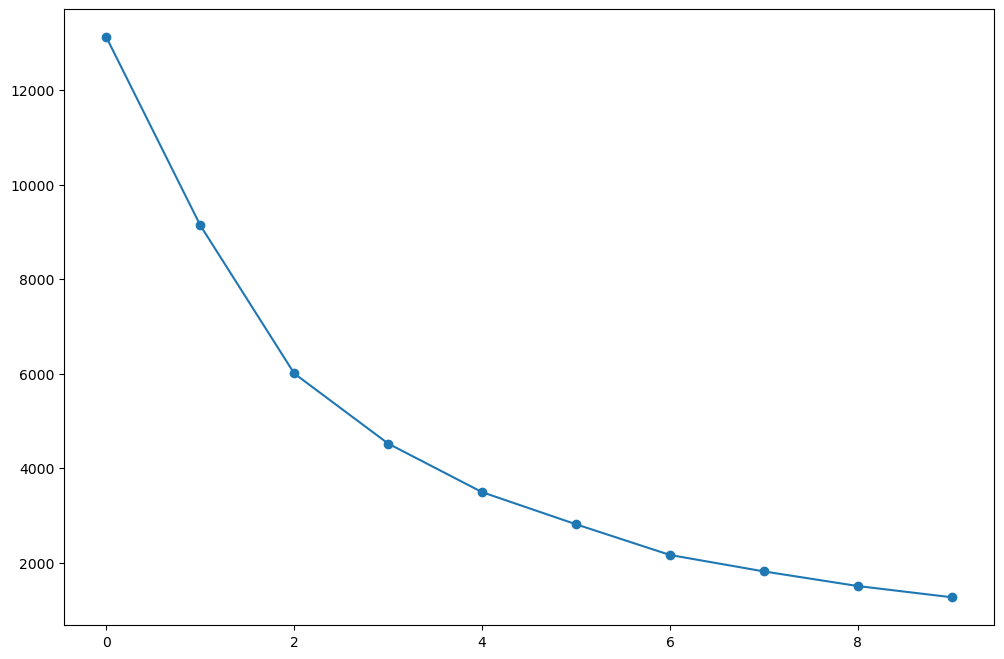

In [14]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"] = kmeans.labels_ + 1

In [16]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,3
12347.0,61,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,3
...,...,...,...,...
18280.0,181,1,180.60,3
18281.0,25,1,80.82,1
18282.0,114,3,176.60,1


In [17]:
final = RFM.groupby("Clusters")["Recency", "Frequency", "Monetary"].mean()
final

/var/folders/_y/pvgfq5js6mgdm51x8_8yp75c0000gn/T/ipykernel_23685/2470886269.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final = RFM.groupby("Clusters")["Recency", "Frequency", "Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,67.024186,5.693953,1839.244628
2,30.608696,86.869565,81835.857391
3,281.558719,1.627224,432.630934


In [18]:






final = RFM.groupby("Clusters")["Recency", "Frequency", "Monetary"].mean()
final

/var/folders/_y/pvgfq5js6mgdm51x8_8yp75c0000gn/T/ipykernel_23685/3476600644.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final = RFM.groupby("Clusters")["Recency", "Frequency", "Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,67.024186,5.693953,1839.244628
2,30.608696,86.869565,81835.857391
3,281.558719,1.627224,432.630934


In [19]:
def func(row):
    if row["Clusters"]==1:
        return 'Whales'
    elif row["Clusters"]==2:
        return 'Lapsed Cx'
    else:
        return 'Avg. Cx'

In [20]:
RFM['group']=RFM.apply(func, axis=1)


In [21]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,3,Avg. Cx
12347.0,61,7,4310.00,1,Whales
12348.0,97,4,1797.24,1,Whales
12349.0,40,1,1757.55,1,Whales
12350.0,332,1,334.40,3,Avg. Cx
...,...,...,...,...,...
18280.0,181,1,180.60,3,Avg. Cx
18281.0,25,1,80.82,1,Whales
18282.0,114,3,176.60,1,Whales


In [22]:
result=RFM.group.value_counts()


In [23]:
result


Whales       3225
Avg. Cx      1124
Lapsed Cx      23
Name: group, dtype: int64

<AxesSubplot:>

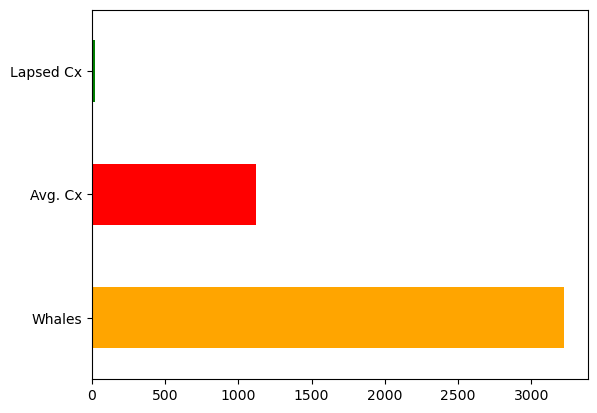

In [24]:
result.plot(kind="barh", color=["Orange","Red","Green"])
